In [1]:
import growth_simulations as g
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
%load_ext autoreload 

In [3]:
%autoreload 2

In [4]:
def pcc_model(beta, sigma_t, gr, delta):
    # note that the growth function agrees to first order with that in the main text under the substitution delta=alpha
    temp_r=beta/(1-beta)
    num=delta/(2-delta)*((1-delta)*(np.log(temp_r)/(2*gr))**2-sigma_t**2)
    sigma_tdn=np.sqrt(2*sigma_t**2/(2-delta)+delta/(2-delta)*(np.log(temp_r)/(2*gr))**2)
    sigma_tdn1=np.sqrt((2*sigma_t**2+delta*(1-delta)**2*(np.log(temp_r)/(2*gr))**2)/(2-delta))
    denom=sigma_tdn*sigma_tdn1
    return num/denom

def pcc_model_siblings(beta, sigma_t, gr, delta):
    # note that the growth function agrees to first order with that in the main text under the substitution delta=alpha
    temp_r=beta/(1-beta)
    num=(2-delta)*sigma_t**2
    denom=2*sigma_t**2+delta*(1-delta)**2*(np.log(temp_r)/(2*gr))**2
    return 1-num/denom

In [6]:
data=np.load('./output_compiled.npy')
# temp_data1=np.load('./output_compiled_repeat1.npy')

# # Setting simulation parameters
# # Setting simulation parameters
l = np.array([1.0])
td_std = np.linspace(0.0, 0.1, 5)  # 3
lambda_std = np.array([0.0])  # 3
delta = np.array([1.0])
beta = np.linspace(0.025, 0.5, num=20)  # 20
r = beta/(1-beta)
alpha = np.linspace(0.0, 1.0, num=6)  # 11
num_rep = 100  # number of repeats

x=1-2*beta
par_vals = {'nstep': 900, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 14, 'delta': delta[0], 'lambda': l[0], 'exp_n':4, 'T2':0.0, 'epsilon':0.0}
X = [len(td_std), len(lambda_std), len(beta), len(alpha), num_rep]
print data.shape

(5, 1, 20, 6, 100, 3, 9)


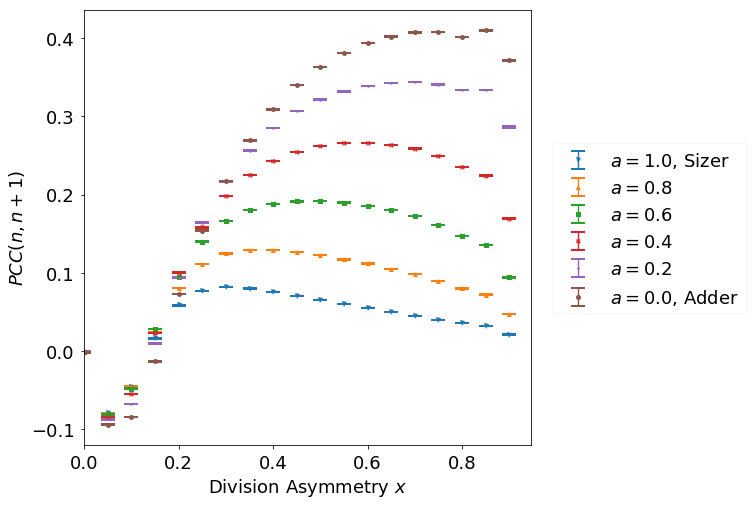

In [41]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=4
i1=0
ind_beta_start=1
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.','o']
# sizes=[8,5,5,5,5]
add_labels = [', Sizer','','','', '',', Adder']
for ind in range(6):
    yv=np.mean(data[i0,i1,ind_beta_start:,ind,:,1,0],axis=1)
    ystd=np.std(data[i0,i1,ind_beta_start:,ind,:,1,0],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ a={0}$'.format(1-alpha[ind])+add_labels[ind],linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
# for ind in range(6):
#     yv=pcc_model(0.5-0.5*xv,td_std[i0],1.0,0.5+0.5*(1-alpha[ind]))
# #     plt.plot(xv,yv,label=r'Theory $\alpha={0}$'.format(alpha[ind]),linestyle='--',lw=2)
#     plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'$PCC(n,n+1)$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18},loc=[1.05,0.3])
fig.savefig('/mnt/d//Dropbox/19_growth_rate_paper/Figures/correlations/parent_daughter_inh_diln.eps',dpi=300,bbox_inches='tight')

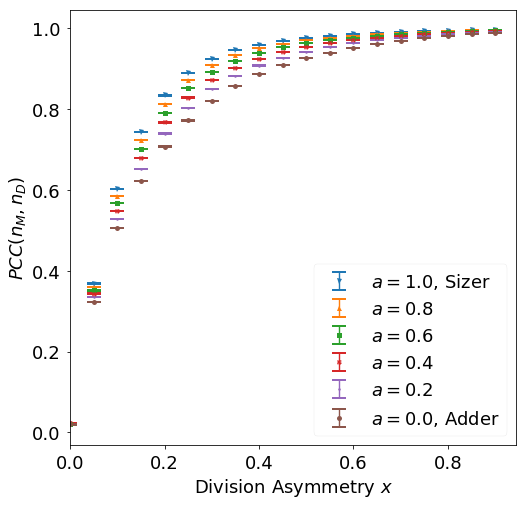

In [38]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=4
i1=0
ind_beta_start=1
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.','o']
# sizes=[8,5,5,5,5]
add_labels = [', Sizer','','','', '',', Adder']
for ind in range(6):
    yv=np.mean(data[i0,i1,ind_beta_start:,ind,:,2,0],axis=1)
    ystd=np.std(data[i0,i1,ind_beta_start:,ind,:,2,0],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ a={0}$'.format(1-alpha[ind])+add_labels[ind],linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
# for ind in range(1,5):
#     yv=pcc_model_siblings(0.5*(1-xv),td_std[i0],1.0,alpha[ind])
#     #     plt.plot(xv,yv,label=r'Theory $\alpha={0}$'.format(alpha[ind]),linestyle='--',lw=2)
#     plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)

plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'$PCC(n_M,n_D)$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/correlations/siblings_inh_diln.eps',dpi=300,bbox_inches='tight')

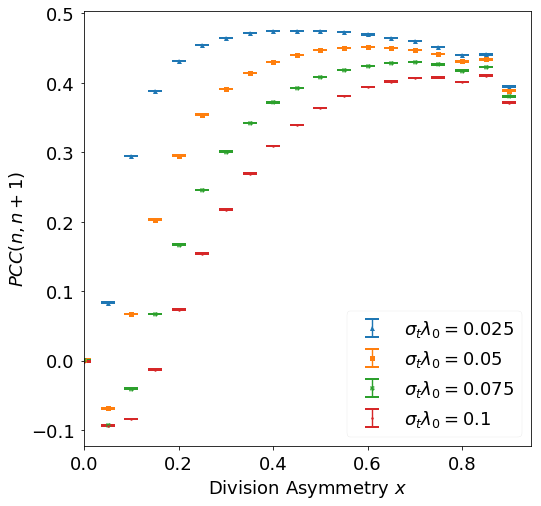

In [39]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=5
i1=0
ind_beta_start=1
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.']
# sizes=[8,5,5,5,5]
for ind in range(1,5):
    yv=np.mean(data[ind,i1,ind_beta_start:,i0,:,1,0],axis=1)
    ystd=np.std(data[ind,i1,ind_beta_start:,i0,:,1,0],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \sigma_t\lambda_0={0}$'.format(td_std[ind]),linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
# for ind in range(1,5):
#     yv=pcc_model(0.5*(1-xv),td_std[ind],1.0,0.5+0.5*(1-alpha[i0]))
# #     plt.plot(xv,yv,label=r'Theory  $ \sigma_t\lambda_0={0}$'.format(td_std[ind]),linestyle='--',lw=2)
#     plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'$PCC(n,n+1)$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/correlations/variable_td_noise_parent_daughter_inh_diln.eps',dpi=300,bbox_inches='tight')

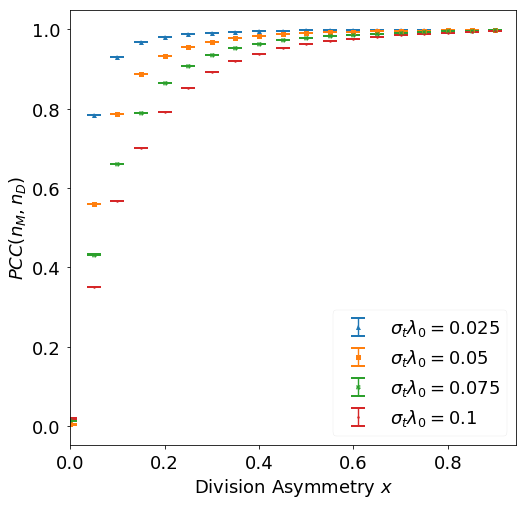

In [40]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=2
i1=0
ind_beta_start=1
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.']
# sizes=[8,5,5,5,5]
for ind in range(1,5):
    yv=np.mean(data[ind,i1,ind_beta_start:,i0,:,2,0],axis=1)
    ystd=np.std(data[ind,i1,ind_beta_start:,i0,:,2,0],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \sigma_t\lambda_0={0}$'.format(td_std[ind]),linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
# for ind in range(1,5):
#     yv=pcc_model_siblings(0.5*(1-xv),td_std[ind],1.0,alpha[i0])
# #     plt.plot(xv,yv,label=r'Theory  $ \sigma_t\lambda_0={0}$'.format(td_std[ind]),linestyle='--',lw=2)
#     plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'$PCC(n_M,n_D)$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/correlations/variable_td_noise_siblings_inh_diln.eps',dpi=300,bbox_inches='tight')